In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
behavior_df = pd.read_csv("datasets/QVI_purchase_behaviour.csv")

In [3]:
transaction_df = pd.read_excel("datasets/QVI_transaction_data.xlsx")

## Examine Transaction Data

In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
import datetime as dt

In [8]:
# convert excel style date into datetime format
transaction_df['DATE'] = pd.TimedeltaIndex(transaction_df['DATE'],unit='d') + dt.datetime(1899,12,30)

In [9]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
# check for missing data
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

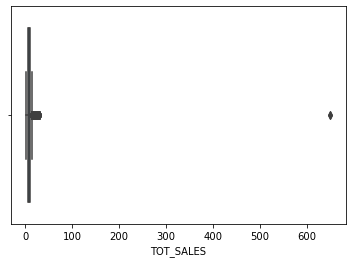

In [11]:
# check for outliers with a boxplot
sns.boxplot(x=transaction_df['TOT_SALES'])

In [12]:
from scipy import stats

In [13]:
# find outliers using z scores

# find the z scores for total_sales
z = np.abs(stats.zscore(transaction_df['TOT_SALES']))
# anything above and below 3 and -3 respectively will be classified as outliers
threshold = 3

# check how many outliers exist for the total sales column
print(len(np.where(z > 3)[0]))

# check dataframe shape (rows and columns)
print(transaction_df.shape)

# remove the outliers
transaction_df = transaction_df[(z<3)]

# check if changes are made
print(transaction_df.shape)

439
(264836, 8)
(264397, 8)


In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_QTY        264397 non-null  int64         
 7   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [17]:
# extract the 175 g from the prod_name column and place in a new column
prod_size_df = transaction_df['PROD_NAME'].str.extract("(\d+)")

# get the index number of the prod_name column 
prod_name_column_loc = transaction_df.columns.get_loc("PROD_NAME")

# insert at a specific index in the dataframe
transaction_df.insert(prod_name_column_loc+1, "PROD_SIZE", prod_size_df)

In [18]:
# check if changes are made
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8


In [19]:
# change datatype for PROD_NAME
transaction_df['PROD_SIZE'] = pd.to_numeric(transaction_df['PROD_SIZE'])

In [20]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264397 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264397 non-null  datetime64[ns]
 1   STORE_NBR       264397 non-null  int64         
 2   LYLTY_CARD_NBR  264397 non-null  int64         
 3   TXN_ID          264397 non-null  int64         
 4   PROD_NBR        264397 non-null  int64         
 5   PROD_NAME       264397 non-null  object        
 6   PROD_SIZE       264397 non-null  int64         
 7   PROD_QTY        264397 non-null  int64         
 8   TOT_SALES       264397 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 20.2+ MB


In [21]:
transaction_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9


In [22]:
import re

In [23]:
transaction_df.reset_index(drop=True,inplace=True)

In [24]:
for i in range(transaction_df.shape[0]):
    edited_text = re.sub('\d\w*',"",transaction_df['PROD_NAME'][i])
    transaction_df['PROD_NAME'][i] = edited_text

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,150,3,13.8


In [26]:
# drop rows that contain the word "salsa" (not chips)
# some products here are not actually chips

# set all words to lower case before finding the word "salsa"
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.lower())

# select only rows that does NOT contain salsa
transaction_df['PROD_NAME'] = transaction_df.loc[~(transaction_df['PROD_NAME'].str.contains("salsa"))]

# change words back to upper case
transaction_df['PROD_NAME'] = transaction_df['PROD_NAME'].apply(lambda x: x.title())


AttributeError: 'Timestamp' object has no attribute 'title'

In [ ]:
transaction_df.head()

In [ ]:
# check if data is recorded correctly for each product number
for i in transaction_df['PROD_NBR'].unique():
    unique_value_check = transaction_df.loc[transaction_df['PROD_NBR'] == i]['PROD_NBR'].nunique()
    if unique_value_check != 1:
        print(i)

In [132]:
# check date numbers
transaction_df['DATE'].nunique()
# looks like it's missing a number...

364

In [135]:
# check date range
start_date = transaction_df['DATE'].min()
end_date = transaction_df['DATE'].max()
print(start_date)
print(end_date)

# check for any missing dates
pd.date_range(start = start_date, end = end_date).difference(transaction_df['DATE'])

2018-07-01 00:00:00
2019-06-30 00:00:00


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

December 25 is missing from the dataset but it's also Christmas day so the stores are probably closed

In [123]:
# determine number of stores
transaction_df['STORE_NBR'].nunique()

272

In [124]:
# check number of products
transaction_df['PROD_NBR'].nunique()

114

In [125]:
# check number of different customers
transaction_df['LYLTY_CARD_NBR'].nunique()

72601

In [136]:
# check prod_quantity unique values
transaction_df['PROD_QTY'].unique()

array([2, 3, 5, 1, 4], dtype=int64)

In [126]:
# check max and min values to see if they make sense
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_SIZE,PROD_QTY,TOT_SALES
count,264397.000000,2.643970e+05,2.643970e+05,264397.000000,264397.000000,264397.000000,264397.000000
mean,135.073999,1.355439e+05,1.351525e+05,56.588706,182.384040,1.901523,7.276687
std,76.787664,8.058948e+04,7.813661e+04,32.825008,64.286611,0.326093,2.463343
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.500000
25%,70.000000,7.001900e+04,6.759100e+04,28.000000,150.000000,2.000000,5.400000
50%,130.000000,1.303550e+05,1.351300e+05,56.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.027010e+05,85.000000,175.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,5.000000,16.500000


In [140]:
# find the product that have the highest sales numbers
transaction_df.groupby(by='PROD_NBR').mean().sort_values(by='TOT_SALES', ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_SIZE,PROD_QTY,TOT_SALES
PROD_NBR,,,,,,
4,138.061282,139191.621307,138146.721873,380.0,1.918919,12.266656
14,133.453782,134326.274199,133572.684407,380.0,1.894180,11.175661
20,135.156229,135324.622281,135176.685893,330.0,1.909031,10.881477
7,134.931310,135102.980511,135027.150479,330.0,1.907987,10.875527
16,134.323502,135431.010668,134375.604644,330.0,1.903044,10.847349
...,...,...,...,...,...,...
72,136.957447,137106.179433,136959.118440,175.0,1.890780,3.214326
95,137.055866,138780.236732,137245.493017,90.0,1.889665,3.212430
92,134.734833,134884.648262,134794.939332,175.0,1.885481,3.205317


check for seasonalities with sales

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [158]:
# find any trends
date_group = transaction_df.sort_values(by="DATE").groupby(by='DATE').mean()['TOT_SALES']
date_group.head(3)

DATE
2018-07-01    7.420166
2018-07-02    7.475949
2018-07-03    7.370914
Name: TOT_SALES, dtype: float64

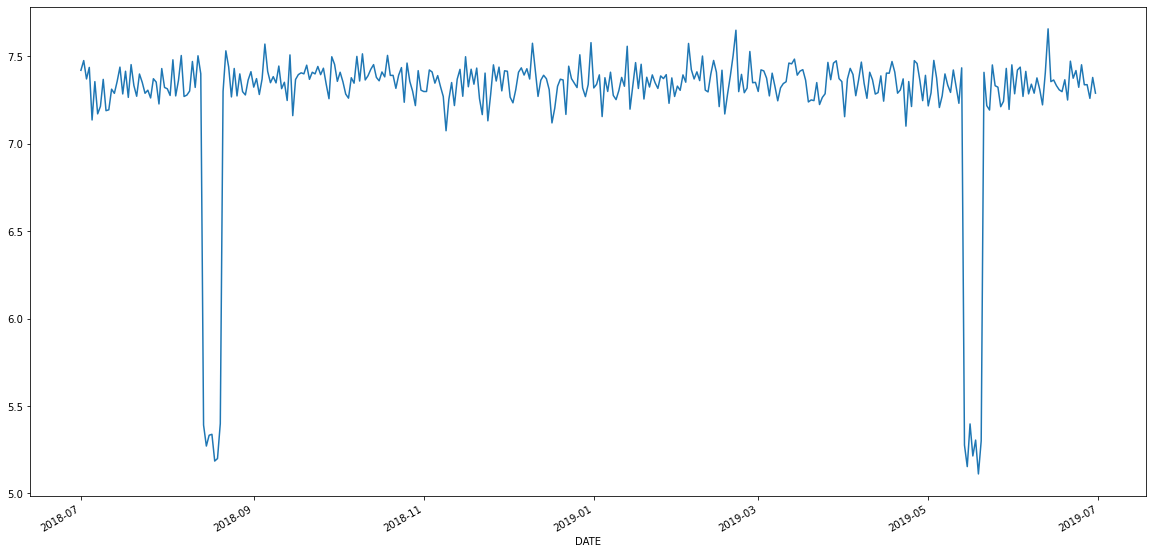

In [159]:
plt.figure(figsize=(20,10))
date_group.plot()
plt.savefig("chip_sales.jpg")

In [163]:
some_df = date_group.reset_index()
some_df.head(3)

,DATE,TOT_SALES
0,2018-07-01,7.420166
1,2018-07-02,7.475949
2,2018-07-03,7.370914


In [174]:
some_df.loc[some_df['DATE'].dt.month==8]

,DATE,TOT_SALES
31,2018-08-01,7.314501
32,2018-08-02,7.276331
33,2018-08-03,7.480389
34,2018-08-04,7.273803
35,2018-08-05,7.362880
36,2018-08-06,7.504868
37,2018-08-07,7.270563
38,2018-08-08,7.278371
39,2018-08-09,7.301543
40,2018-08-10,7.470718


In [165]:
some_df.loc[some_df["DATE"].dt.month==5]

,DATE,TOT_SALES
303,2019-05-01,7.216714
304,2019-05-02,7.290960
305,2019-05-03,7.476912
306,2019-05-04,7.375994
307,2019-05-05,7.207438
308,2019-05-06,7.273885
309,2019-05-07,7.399578
310,2019-05-08,7.334933
311,2019-05-09,7.293776
312,2019-05-10,7.422113


may 14-20 and August 14-20 have ower sales on average compared to other days

## Examine Customer Data

In [93]:
# check for null values
behavior_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [97]:
behavior_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


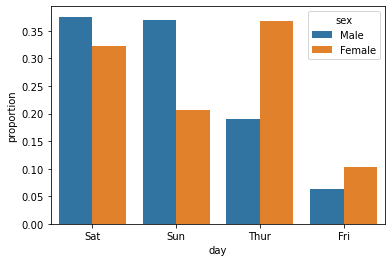

In [175]:

df = sns.load_dataset("tips")
x, y, hue = "day", "proportion", "sex"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [181]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


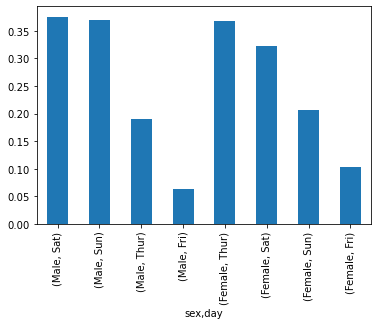

In [192]:
df['day'].groupby(df['sex']).value_counts(normalize=True).plot(kind="bar")

In [177]:
df[x]\
 .groupby(df[hue])\
 .value_counts(normalize=True)\
 .rename(y)\
 .reset_index()

,sex,day,proportion
0,Male,Sat,0.375796
1,Male,Sun,0.369427
2,Male,Thur,0.191083
3,Male,Fri,0.063694
4,Female,Thur,0.367816
5,Female,Sat,0.321839
6,Female,Sun,0.206897
7,Female,Fri,0.103448


In [ ]:
df_cfa_outcome.loc[df_cfa_outcome["outcome_type"]